# Convolutional Neural Network Architecture

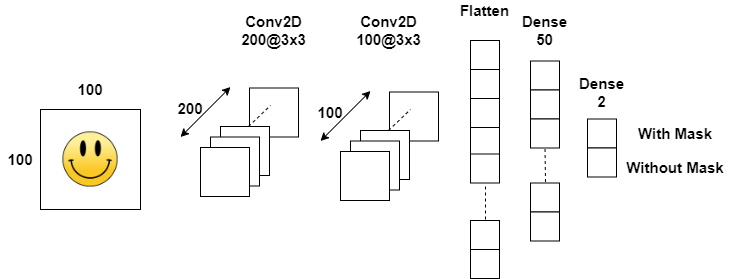

In [25]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [26]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [28]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Train on 990 samples, validate on 248 samples
Epoch 1/20
990/990 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5384 - val_loss: 0.6695 - val_accuracy: 0.6815
Epoch 2/20
990/990 [==============================] - 1s 1ms/step - loss: 0.6241 - accuracy: 0.6384 - val_loss: 0.5249 - val_accuracy: 0.7903
Epoch 3/20
990/990 [==============================] - 1s 1ms/step - loss: 0.4146 - accuracy: 0.8202 - val_loss: 0.2975 - val_accuracy: 0.8992
Epoch 4/20
990/990 [==============================] - 1s 1ms/step - loss: 0.2460 - accuracy: 0.9040 - val_loss: 0.1770 - val_accuracy: 0.9355
Epoch 5/20
990/990 [==============================] - 1s 1ms/step - loss: 0.1924 - accuracy: 0.9253 - val_loss: 0.1335 - val_accuracy: 0.9355
Epoch 6/20
990/990 [==============================] - 1s 1ms/step - loss: 0.1518 - accuracy: 0.9414 - val_loss: 0.1195 - val_accuracy: 0.9355
Epoch 7/20
990/990 [==============================] - 1s 1ms/step - loss: 0.1139 - accuracy: 0.9566 - 

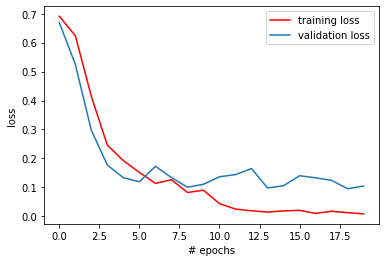

In [29]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

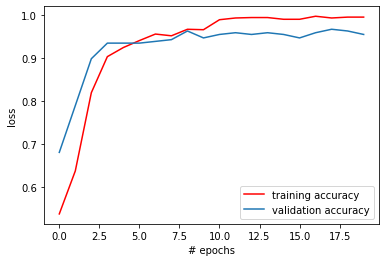

In [30]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [31]:
print(model.evaluate(test_data,test_target))

138/138 [==============================] - 0s 426us/step
[0.12691013054733258, 0.95652174949646]
